# Introduction

For more personal offers and retention plans it is useful divide custumers to groups. For this reason clusterization is used. Based on features importance (previous analysis for model creation) __tenure, MonthlyCharges and Contract__ type was chosen as factors for clusterization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Data import and structurization

In [2]:
telco_cl=pd.read_csv('Churn.csv')
telco_cl.TotalCharges = pd.to_numeric(telco_cl.TotalCharges, errors=0)

telco_cl.dropna(inplace = True)
telco_cl.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One_year,No,Bank_transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [3]:
clustering=telco_cl.copy()
clustering=telco_cl[['MonthlyCharges', 'Contract','tenure']]

In [4]:
clustering['Contract']=clustering['Contract'].replace({'Month-to-month':0,'One_year':1, 'Two_year':2})
x=clustering.values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Data standardization and optimal clusters' number selection

In [5]:
ss=StandardScaler()
ss.fit(x) 
x=ss.transform(x) 

Text(0, 0.5, 'Sum of squared distances')

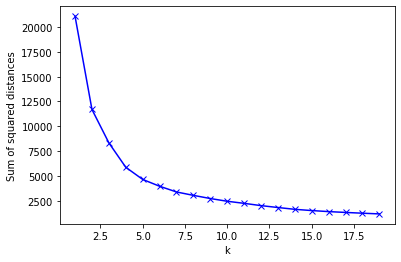

In [6]:
sum_of_squared_distances = []
k_range = range(1,20)
for k in k_range:
    model = KMeans(n_clusters = k)
    model=model.fit(x)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(k_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

In [7]:
model=KMeans(n_clusters=4)
y_clusters=model.fit_predict(x)

In [8]:
telco_cl['Cluster']=model.labels_
telco_cl['Churn']=telco_cl['Churn'].replace({'No':0,'Yes':1})

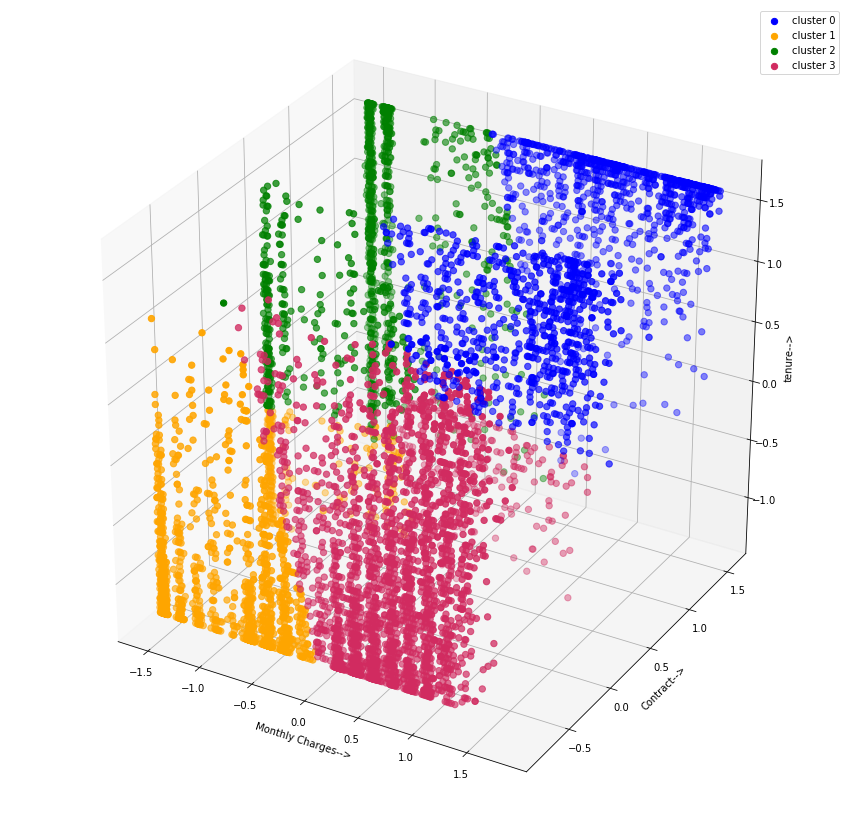

In [9]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.set_xlabel('Monthly Charges-->')
ax.set_ylabel('Contract-->')
ax.set_zlabel('tenure-->')
ax.legend()

# Analysis of clusters

In [10]:
churnc=telco_cl.groupby(['Cluster'])['Churn'].mean()
means=telco_cl.groupby('Cluster')['tenure','MonthlyCharges'].mean()

In [11]:
contract_mtm=telco_cl[telco_cl['Contract']=='Month-to-month'].groupby('Cluster')['Cluster'].count()
contract_all=telco_cl.groupby('Cluster')['Cluster'].count()
c_mtm=contract_mtm/contract_all
c_mtm

Cluster
0    0.012626
1    0.838253
2    0.000898
3    0.921621
Name: Cluster, dtype: float64

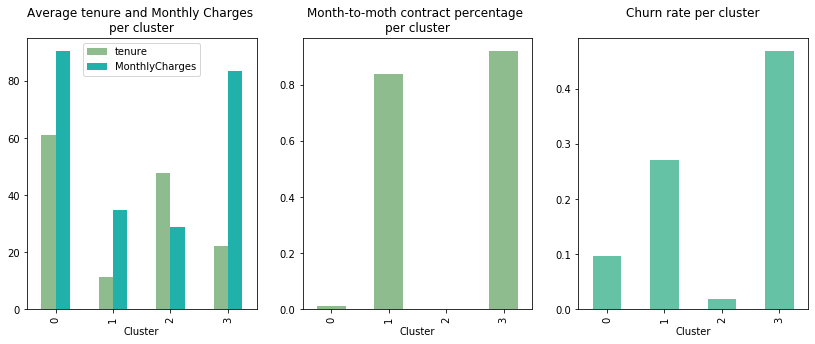

In [12]:
fig, (ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(14,5))
ax1.set_title('Average tenure and Monthly Charges \nper cluster')
ax2.set_title('Month-to-moth contract percentage \nper cluster')
ax3.set_title('Churn rate per cluster\n')

means.plot(kind='bar', color=['darkseagreen','lightseagreen'], ax=ax1)
c_mtm.plot(kind='bar', color=['darkseagreen'], ax=ax2)
churnc.plot(kind='bar', cmap='Set2', ax=ax3)


# Conclusions

Based on graphs above, the focus should be on cluster 1 and 3, since there is the highest churn rate. As it can be seen in the first and second visualizations, these two clusters contain mostly custumers with Month-to-month contracts and have relatively short tenure.